In [2044]:
#  Libraries
#  Linear Algebra
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from scipy import stats
from scipy.stats import randint

#  Preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

#  Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier

#  Validation Libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#  Naive Bayes
from sklearn.naive_bayes import GaussianNB 

#  Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Neural Network
from sklearn.neural_network import MLPClassifier

In [2045]:
#  Read the CSV's from the file path
survey = pd.read_csv('../input/mental-health-in-tech-survey/survey.csv')

In [2046]:
survey.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [2047]:
print(survey.shape)

(1259, 27)


In [2048]:
print(survey.describe())

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


In [2049]:
print(survey.columns)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [2050]:
print(survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [2051]:
survey.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

Text(0.5, 1.0, 'Treatement Distribution')

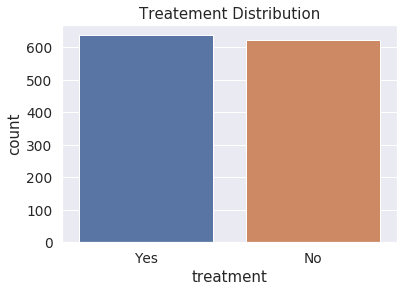

In [2052]:
#  Exploratory Data Analysis
#  Treatment Distribution
sns.countplot(survey['treatment'])
plt.title('Treatement Distribution')

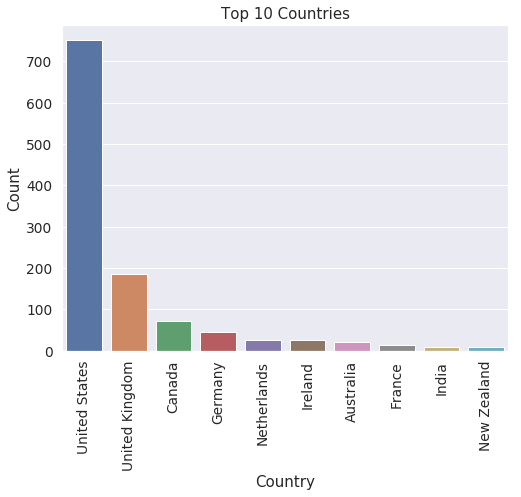

In [2053]:
#  Top Ten Countries
country_count = Counter(survey['Country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize = (8,6))
sns.barplot(x = country_idx,y = country_val ,ax = ax)
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation = 90)

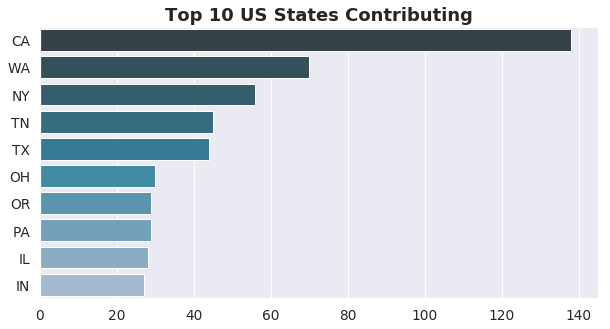

In [2054]:
US = survey.loc[survey['Country'] == 'United States']
top_US = US['state'].value_counts()[:10].to_frame()
plt.figure(figsize=(10,5))
sns.barplot(top_US['state'],top_US.index,palette="PuBuGn_d")
plt.title('Top 10 US States Contributing',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

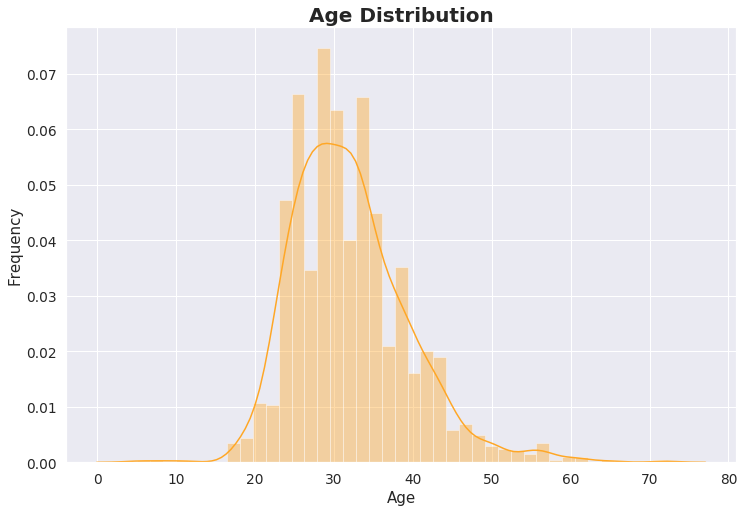

In [2055]:
#  Age Distribution
def process_age(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
survey['Age'] = survey['Age'].apply(process_age)
plt.figure(figsize=(12,8))
sns.distplot(survey['Age'].dropna(), color = '#ffa726') 
plt.title("Age Distribution",fontsize=20,fontweight="bold")
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.show()

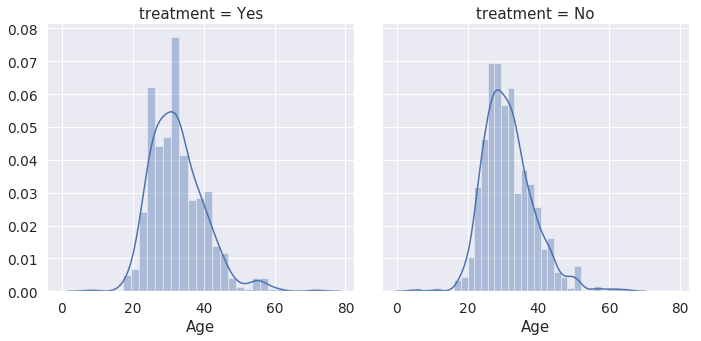

In [2056]:
#  Separating By Treatment 
graph = sns.FacetGrid(survey, col = 'treatment', height = 5)
graph = graph.map(sns.distplot, "Age")

In [2057]:
#  Gender Exploration
#  Clean up the gender column
survey['Gender'] = survey['Gender'].str.lower()
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
trans = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"]
survey['Gender'] = survey['Gender'].apply(lambda x:"Trans" if x in trans else x)
survey['Gender'] = survey['Gender'].apply(lambda x:"Female" if x in female else x)
survey['Gender'] = survey['Gender'].apply(lambda x:"Male" if x in male else x)
survey.drop(survey[survey.Gender == 'a little about you'].index, inplace=True)
survey.drop(survey[survey.Gender == 'p'].index, inplace=True)

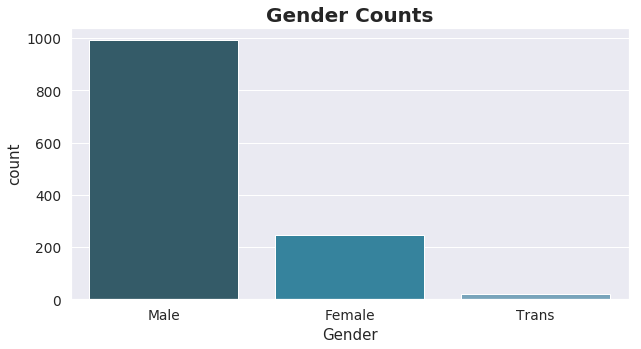

In [2058]:
plt.figure(figsize=(10,5))
sns.countplot('Gender',data = survey, order = survey['Gender'].value_counts().index, palette = "PuBuGn_d") 
plt.title("Gender Counts",fontsize = 20,fontweight = "bold")
plt.show()

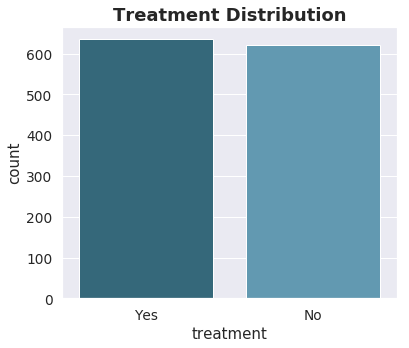

In [2059]:
#  How many of them are taking treatments ?
plt.figure(figsize=(6,5))
sns.countplot(survey['treatment'],palette="PuBuGn_d")
plt.title("Treatment Distribution",fontsize=18,fontweight="bold")
plt.show()

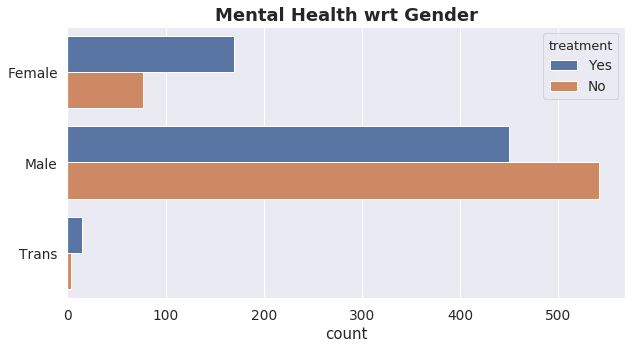

In [2060]:
plt.figure(figsize = (10,5))
sns.countplot(y = "Gender", hue = "treatment", data = survey)
plt.title("Mental Health wrt Gender",fontsize = 18,fontweight = "bold")
plt.ylabel("")
plt.show()

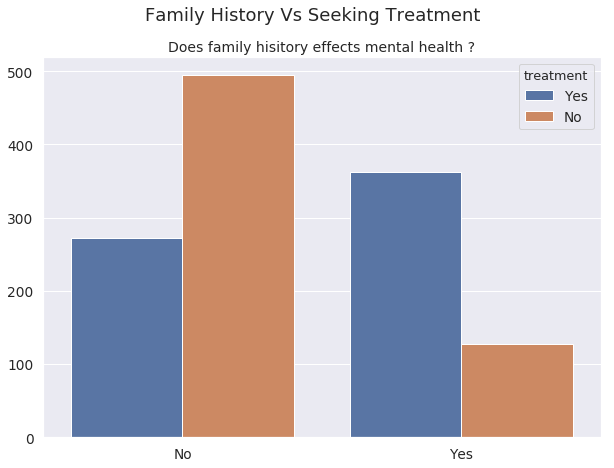

In [2061]:
#  Family History Vs Seeking Treatments
plt.figure(figsize = (10,7))
sns.countplot(x = "family_history", hue = "treatment", hue_order = ["Yes", "No"], data = survey)
plt.suptitle("Family History Vs Seeking Treatment", fontsize = 18)
plt.title("Does family hisitory effects mental health ?", fontsize = 14)
plt.xlabel("")
plt.ylabel("")
plt.show()

Text(0.5, 0, 'Employee Group')

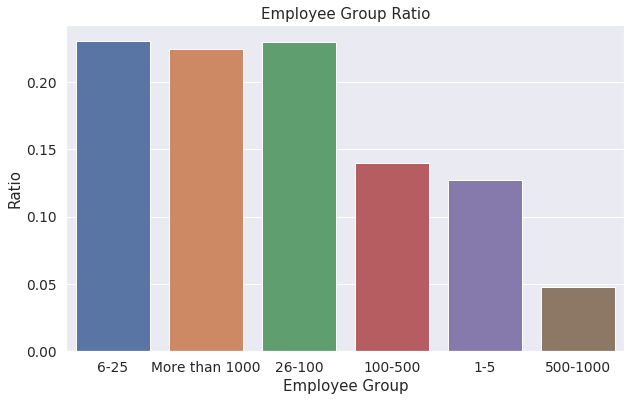

In [2062]:
#  Employee Group Ratio
fig,ax = plt.subplots(figsize = (12,6))
total = survey['no_employees'].dropna().shape[0] * 1.0
employee_count  = Counter(survey['no_employees'].dropna().tolist())
for key,val in employee_count.items():
    employee_count[key] = employee_count[key] / total
employee_group = np.asarray(list(employee_count.keys()))
employee_val = np.asarray(list(employee_count.values()))
sns.barplot(x = employee_group , y = employee_val)
plt.title('Employee Group Ratio')
plt.ylabel('Ratio')
plt.xlabel('Employee Group')

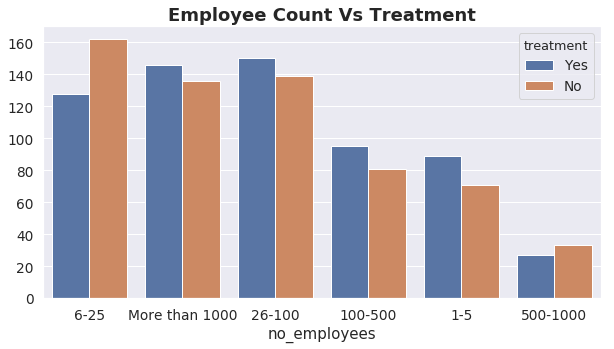

In [2063]:
plt.figure(figsize = (10,5))
sns.countplot("no_employees", hue = "treatment", data = survey)
plt.title("Employee Count Vs Treatment",fontsize = 18,fontweight = "bold")
plt.ylabel("")
plt.show()

Text(0.5, 1.0, 'No Employee Vs Tech Company')

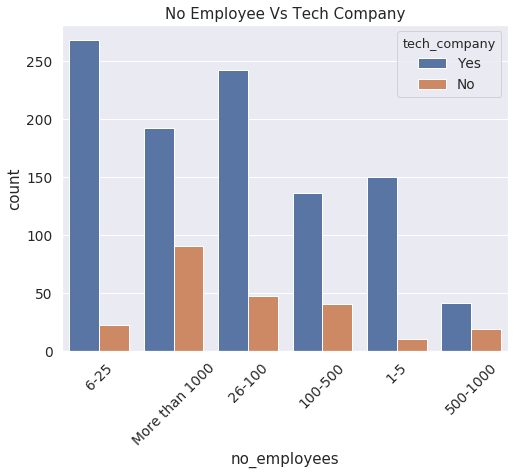

In [2064]:
fig,ax = plt.subplots(figsize = (8,6))
sns.countplot(data = survey,x = 'no_employees', hue ='tech_company',ax = ax )
ticks = plt.setp(ax.get_xticklabels(),rotation = 45)
plt.title('No Employee Vs Tech Company')

Text(0.5, 1.0, 'No Employee Vs Remote Work')

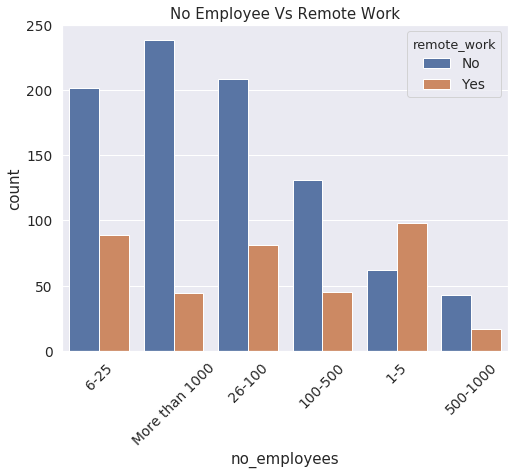

In [2065]:
#  Remote Work Vs Employee Group
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data = survey,x = 'no_employees', hue ='remote_work',ax = ax )
ticks = plt.setp(ax.get_xticklabels(),rotation = 45)
plt.title('No Employee Vs Remote Work')

Text(0, 0.5, 'Count')

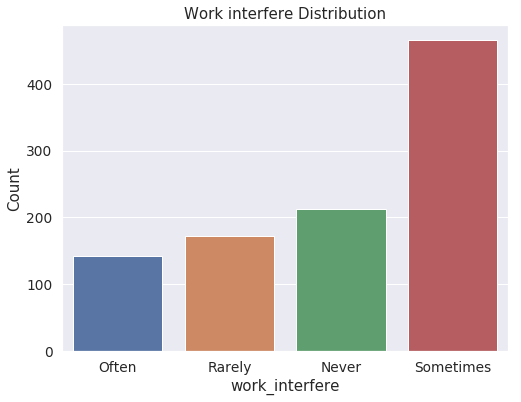

In [2066]:
#  Work Interfere Distribution
fig,ax  = plt.subplots(figsize = (8,6))
sns.countplot(survey['work_interfere'].dropna(),ax = ax)
plt.title('Work interfere Distribution')
plt.ylabel('Count')

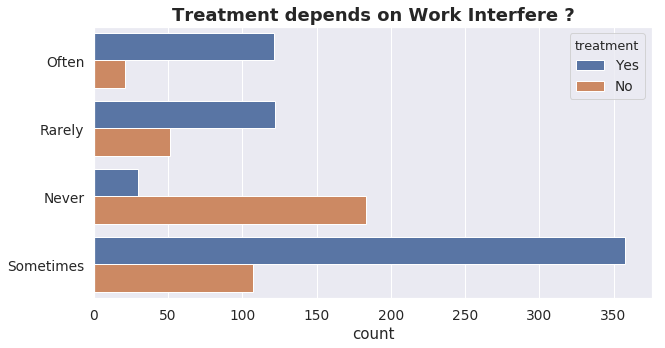

In [2067]:
plt.figure(figsize = (10,5))
sns.countplot(y = "work_interfere", hue = "treatment", data = survey)
plt.title("Treatment depends on Work Interfere ?",fontsize = 18,fontweight = "bold")
plt.ylabel("")
plt.show()

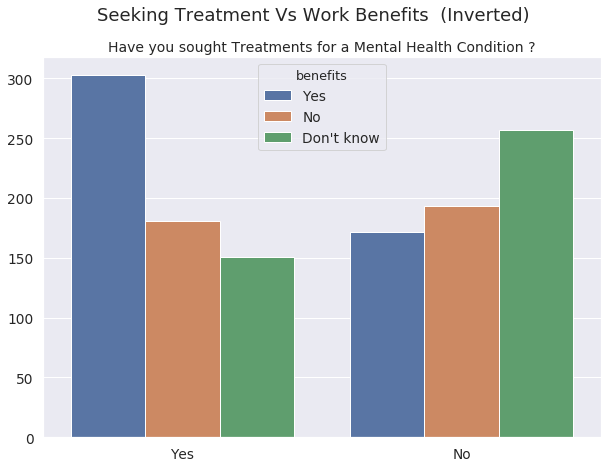

In [2068]:
 #  Generating A Chart Comparing Mental Health Benefits & Treatments    
plt.figure(figsize = (10,7))
sns.countplot(x = "treatment", hue = "benefits", hue_order = ["Yes", "No", "Don't know"], data = survey)
plt.suptitle("Seeking Treatment Vs Work Benefits  (Inverted)", fontsize = 18)
plt.title("Have you sought Treatments for a Mental Health Condition ?",fontsize = 14)
plt.xlabel("")
plt.ylabel("")
plt.show()

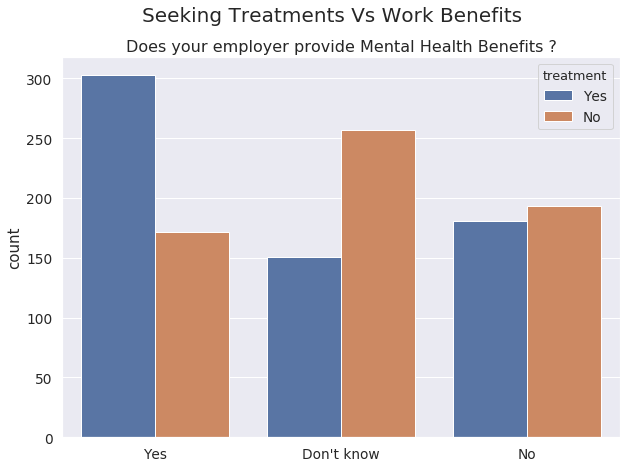

In [2069]:
#   Mental Health Benefits Vs Seeking Treatments
plt.figure(figsize = (10,7))
sns.countplot(x = "benefits", hue = "treatment", hue_order = ["Yes", "No"], data = survey)
plt.title("Does your employer provide Mental Health Benefits ?",fontsize = 16)
plt.suptitle("Seeking Treatments Vs Work Benefits", fontsize = 20)
plt.xlabel("")
plt.show()

In [2070]:
#  Data Preprocessing
#  Removing the variables "Timestamp",“comments”, “state”.
survey = survey.drop(['comments'], axis= 1)
survey = survey.drop(['state'], axis= 1)
survey = survey.drop(['Timestamp'], axis= 1)

In [2071]:
#  Checking missing data
survey.isnull().sum().max() 

264

In [2072]:
survey.isnull().sum()

Age                            4
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [2073]:
#  Assigning Default Values For Each Data Type
dString = 'NaN'
dInt = 0

In [2074]:
#  Creating Lists By Data Type
strings = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
ints = ['Age']

In [2075]:
#  Cleaning the NaN's
for feature in survey:
    if feature in ints:
        survey[feature] = survey[feature].fillna(dInt)
    elif feature in strings:
        survey[feature] = survey[feature].fillna(dString)
    else:
        print('Error: Feature %s Not Recognized.' % feature)
survey.tail()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1254,26.0,Male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32.0,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34.0,Male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46.0,Female,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No
1258,25.0,Male,United States,No,Yes,Yes,Sometimes,26-100,No,No,...,Yes,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No


In [2076]:
#  Completing Missing Age with Median Value
survey['Age'].fillna(survey['Age'].median(), inplace = True)

In [2077]:
survey.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [2078]:
# Filling with Median Values < 18 & > 120
xyz = pd.Series(survey['Age'])
xyz[xyz < 18] = survey['Age'].median()
survey['Age'] = xyz
xyz = pd.Series(survey['Age'])
xyz[xyz > 120] = survey['Age'].median()
survey['Age'] = xyz

In [2079]:
#  Ranges of Age
survey['age_range'] = pd.cut(survey['Age'], [0,20,30,65,100], labels = ["0-20", "21-30", "31-65", "66-100"], include_lowest = True)

In [2080]:
#  Replacing "NaN" with "No" in self_employed
survey['self_employed'] = survey['self_employed'].replace([dString], 'No')

In [2081]:
print(survey['self_employed'].unique())

['No' 'Yes']


In [2082]:
#  Replacing "NaN" with "Don't know" in work_interfere
survey['work_interfere'] = survey['work_interfere'].replace([dString], 'Don\'t Know' )

In [2083]:
print(survey['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't Know"]


In [2084]:
survey.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
age_range                    0
dtype: int64

In [2085]:
# Converting Categorial Variables
LE = LabelEncoder()
for i in survey.columns:
    survey[i] = LE.fit_transform(survey[i].astype('str'))

In [2086]:
corr = survey.corr()['treatment']
corr[np.argsort(corr,axis = 0)[::-1]]

treatment                    1.000000
work_interfere               0.615657
family_history               0.376714
care_options                 0.235135
benefits                     0.224767
obs_consequence              0.154008
anonymity                    0.140905
mental_health_interview      0.094859
wellness_program             0.092346
seek_help                    0.087700
Country                      0.080096
Age                          0.072784
coworkers                    0.066022
age_range                    0.062778
mental_vs_physical           0.060552
leave                        0.059034
phys_health_interview        0.049234
mental_health_consequence    0.027943
remote_work                  0.024593
self_employed                0.016264
phys_health_consequence     -0.012776
tech_company                -0.032295
supervisor                  -0.037944
no_employees                -0.047733
Gender                      -0.149882
Name: treatment, dtype: float64

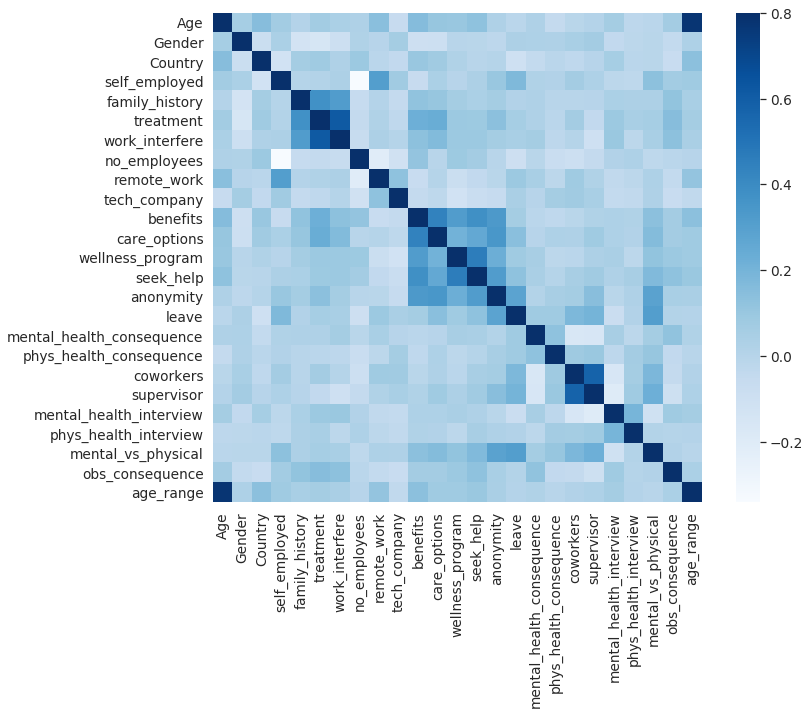

In [2087]:
#  Correlation Matrix
corrM = survey.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrM, vmax=.8, square=True, cmap = 'Blues');
plt.show()

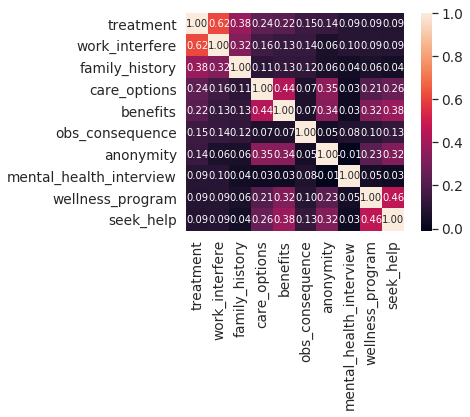

In [2088]:
#  Correlation Matrix of Treatments
#  No of variables for heatmap
k = 10 
cols = corrM.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(survey[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [2089]:
#  Splitting The Dataset
#  Defining X & y
X = survey.drop(['treatment','wellness_program','seek_help','supervisor'], axis=1)
y = survey.treatment

In [2090]:
#  Splitting X & y into training & testing sets
X_tr, X_te, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)

In [2091]:
#  Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_te)

In [2092]:
#  Computing Feature Importances
features = X.columns
ETC = ExtraTreesClassifier(n_estimators=250, random_state=0)

ETC.fit(X, y)
importances = ETC.feature_importances_
std = np.std([tree.feature_importances_ for tree in ETC.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(features[f])   

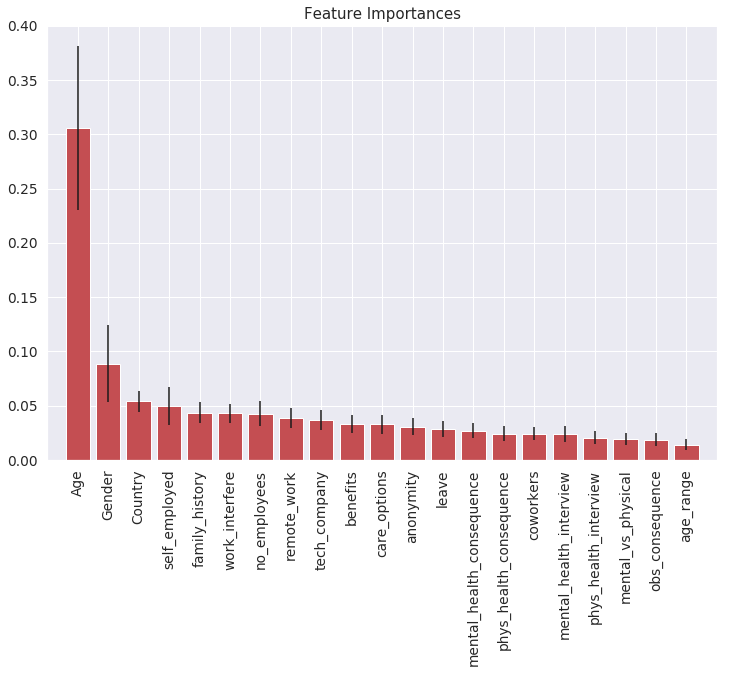

In [2093]:
#  Plotting the feature importances 
plt.figure(figsize = (12,8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices],
       color = "r", yerr = std[indices], align = "center")
plt.xticks(range(X.shape[1]), labels, rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [2094]:
#  Creating Dictionaries For Final Graphs
Models = {}

In [2095]:
def conf_mat(model, y_test, y_pred_class):
    #  Confusion Matrix
    #  Saving Confusion Matrix & Slicing Into 04 Pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #  [row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    #  Visualizing Confusion Matrix
    sns.heatmap(confusion,annot = True,fmt = "d", cmap = 'magma') 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

########### AdaBoost  Classifier ###############


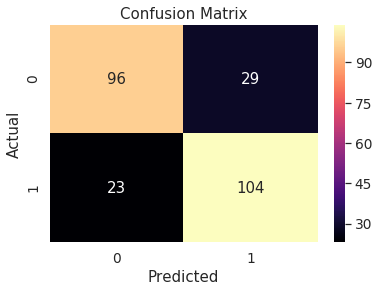

Accuracy :  79.36507936507937 %


In [2096]:
#  AdaBoost
ABC = AdaBoostClassifier()
ABC.fit(X_train,y_train)
y_pred_ABC = ABC.predict(X_test)

print('########### AdaBoost  Classifier ###############')
accuracy_ABC = accuracy_score(y_test, y_pred_ABC)
conf_mat(ABC, y_test, y_pred_ABC)
print('Accuracy : ',accuracy_ABC * 100,'%')

Models['AdaBoost'] = accuracy_ABC * 100

########### Logistic Regression  ###############


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


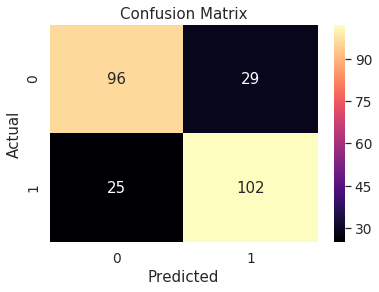

Accuracy :  79.36507936507937 %


In [2097]:
#  Logostic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
    
print('########### Logistic Regression  ###############')
accuracy_LR = accuracy_score(y_test, y_pred_ABC)
conf_mat(LR, y_test, y_pred_LR)
print('Accuracy : ',accuracy_LR * 100,'%')

Models['Logistic Regression'] = accuracy_LR * 100

########### K-Nearest Neighbours  ###############


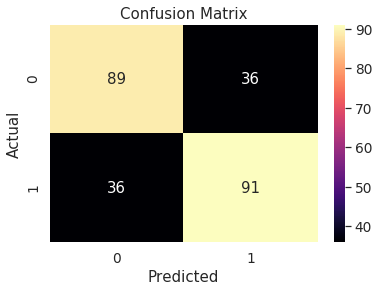

Accuracy :  71.42857142857143 %


In [2098]:
#  KNN
KNN = KNeighborsClassifier(n_neighbors = 15)
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)
    
print('########### K-Nearest Neighbours  ###############')
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
conf_mat(KNN, y_test, y_pred_KNN)
print('Accuracy : ',accuracy_KNN * 100,'%')

Models['KNN'] = accuracy_KNN * 100

########### Extra Tree Classifier  ###############


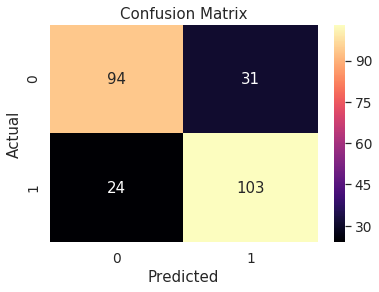

Accuracy :  78.17460317460318 %


In [2099]:
ETC.fit(X_train,y_train)
y_pred_ETC = ETC.predict(X_test)
   
print('########### Extra Tree Classifier  ###############')
accuracy_ETC = accuracy_score(y_test, y_pred_ETC)
conf_mat(ETC, y_test, y_pred_ETC)
print('Accuracy : ',accuracy_ETC * 100,'%')

Models['Extra Tree'] = accuracy_ETC * 100

########### Random Forest Classifier ###############


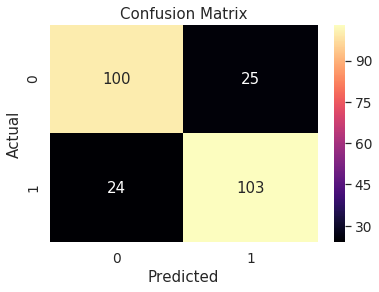

Accuracy :  80.55555555555556 %


In [2100]:
#  Random Forest
RF = RandomForestClassifier(max_depth = 3, min_samples_leaf = 8, min_samples_split = 2, n_estimators = 20, random_state = 1)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
    
print('########### Random Forest Classifier ###############')
accuracy_RF = accuracy_score(y_test, y_pred_RF)
conf_mat(RF, y_test, y_pred_RF)
print('Accuracy : ',accuracy_RF * 100,'%')

Models['Random Forest'] = accuracy_RF * 100

########### Gradient Boosting Classifier  ###############


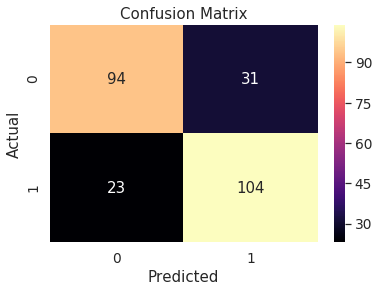

Accuracy :  78.57142857142857 %


In [2101]:
#  Gradient Boosting Classifier
GB = GradientBoostingClassifier(learning_rate = 0.04, n_estimators = 250)
GB.fit(X_train, y_train)
y_pred_GB = GB.predict(X_test)
    
print('########### Gradient Boosting Classifier  ###############')
accuracy_GB = accuracy_score(y_test, y_pred_GB)
conf_mat(GB, y_test, y_pred_GB)
print('Accuracy : ',accuracy_GB * 100,'%')

Models['Gradient Boosting'] = accuracy_GB * 100

########### Bagging Classifier  ###############


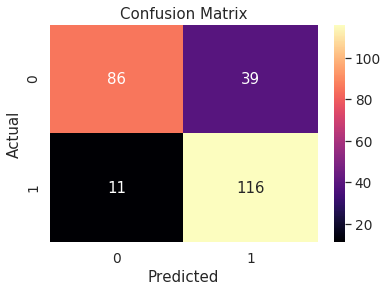

Accuracy :  80.15873015873017 %


In [2102]:
#  Bagging Classifier
BC = BaggingClassifier(random_state = 222, n_estimators=140, max_samples=23, bootstrap=True, n_jobs= -1)
BC.fit(X_train,y_train)
y_pred_BC = BC.predict(X_test)

print('########### Bagging Classifier  ###############')
accuracy_BC = accuracy_score(y_test, y_pred_BC)
conf_mat(BC, y_test, y_pred_BC)
print('Accuracy : ',accuracy_BC * 100,'%')

Models['Bagging Classifier'] = accuracy_BC * 100

########### XGBoost ###############


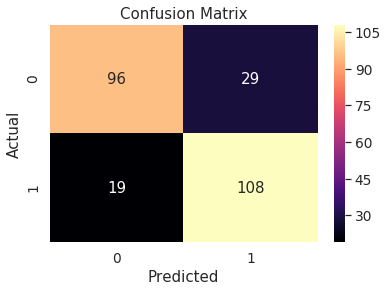

Accuracy :  80.95238095238095 %


In [2103]:
#  XGBoost
XGB = XGBClassifier()

XGB.fit(X_train,y_train)
y_pred_XGB = XGB.predict(X_test)

print('########### XGBoost ###############')
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
conf_mat(XGB, y_test, y_pred_XGB)
print('Accuracy : ',accuracy_XGB * 100,'%')

Models['XGBoost'] = accuracy_XGB * 100

In [2104]:
def plotting():
    s = pd.Series(Models)
    s = s.sort_values(ascending = False)
    plt.figure(figsize = (12,8))
    #  Colors
    ax = s.plot(kind = 'bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Classifiers')
    plt.ylabel('Percentage')
    plt.title('Performance of Classifiers')
     
    plt.show()

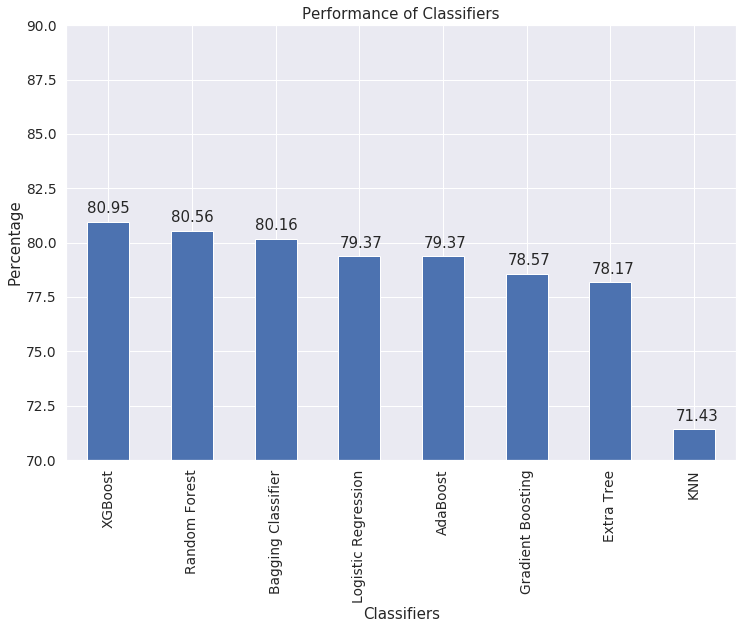

In [2105]:
plotting()